In [2]:
!pip install wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
              'punkt',
              'wordnet',
              'omw-1.4',
              'vader_lexicon'
              ])
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
data = pd.read_csv('tourist_accommodation_reviews.csv', encoding = 'Windows-1252')

In [4]:
data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [5]:
data.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."
53643,rn161212765,"Reviewed May 19, 2013",Patong,Bite in,The restaurant put in a good location in Jungc...


In [6]:
data.shape

(53644, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [8]:
data.isnull().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [9]:
data.columns

Index(['ID', 'Review Date', 'Location', 'Hotel/Restaurant name', 'Review'], dtype='object')

In [10]:
data['Location'].value_counts()

 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: Location, dtype: int64

In [11]:
total_loc = data['Location'].value_counts().reset_index()
total_loc.head()

,index,Location
0,Patong,16403
1,Karon,5826
2,Kata Beach,5752
3,Rawai,3811
4,Choeng Thale,3378


In [12]:
total_loc.columns = ['Region','Total']
total_loc.tail()

,Region,Total
20,Pa Khlok,100
21,Ratsada,98
22,Talat Nuea,97
23,Nai Thon,94
24,Sakhu,91


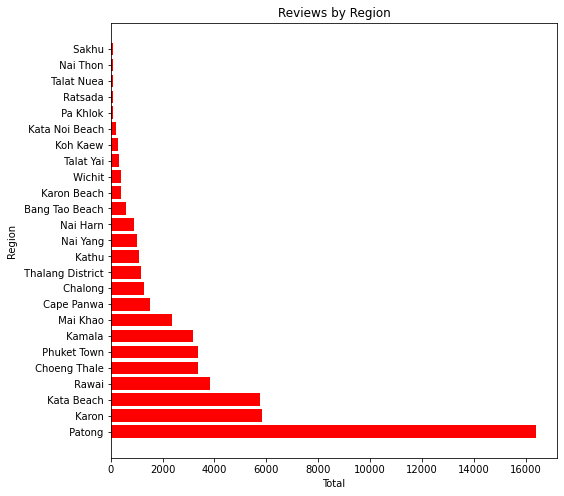

In [13]:
plt.figure(figsize = (8,8))
plt.barh(total_loc['Region'], total_loc['Total'],color='red')
plt.xlabel('Total')
plt.ylabel('Region')
plt.title("Reviews by Region")
plt.show()

In [14]:
Region_sel = data[data['Location'] ==' Kata Beach' ]

In [15]:
Hotels = np.arange(0,30)
Hotels_list = Region_sel['Hotel/Restaurant name'].unique()[Hotels]
Total_Hotels= Region_sel['Hotel/Restaurant name'].isin(Hotels_list)

In [16]:
new_data = Region_sel[Total_Hotels]

In [17]:
new_data

,ID,Review Date,Location,Hotel/Restaurant name,Review
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...
...,...,...,...,...,...
20901,rn349524380,"Reviewed February 20, 2016",Kata Beach,Leonardo Davinci,Amazing place but the food was cold and not at...
20902,rn348832209,"Reviewed February 18, 2016",Kata Beach,Leonardo Davinci,Food was good but very small portions other th...
20903,rn345712857,"Reviewed February 7, 2016",Kata Beach,Leonardo Davinci,Good review for this italian restaurant but we...
20904,rn345363921,"Reviewed February 6, 2016",Kata Beach,Leonardo Davinci,We visited for dinner and found it a short wal...


In [18]:
new_data['Hotel/Restaurant name'].value_counts()

Odysseus Greek Organic Restaurant                         100
Red Chair Restaurant                                      100
Kwong Shop Seafood                                        100
Two Chefs Kata Beach                                      100
Peony Cafe & Restaurant                                   100
Horn Grill Steak and Seafood                              100
Two Chefs Kata Center                                     100
Chai Thaifood Restaurant                                  100
The Kitchen Restaurant Kata Beach & Thai Cooking Class    100
Kampong Kata Hill                                         100
Sugar & Spice Restaurant at Dome Resort                   100
Mom Tri's Kitchen at Villa Royale                         100
The Tavern                                                100
Curry Delight Indian Restaurant                           100
Eightfold Restaurant                                      100
New York Burger Co.                                       100
Kata On 

In [19]:
new_data[Total_Hotels]['Hotel/Restaurant name'].nunique()

C:\Users\toshiba\AppData\Local\Temp\ipykernel_7164\1218362469.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data[Total_Hotels]['Hotel/Restaurant name'].nunique()


30

In [20]:
def preprocess_text(text):
  
  tokenized_text = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  stop_words = nltk.corpus.stopwords.words('english')
  cleaned_tokens = [word.lower() for word in tokenized_text if word.lower() not in stop_words]
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [21]:
new_text = new_data['Review'].apply(preprocess_text)

In [22]:
new_text.head(30)

100    [food, tasti, fresh, fast, servic, owner, supe...
101    [great, varieti, greek, dish, fantast, servic,...
102    [excel, culinari, experi, new, restaur, phuket...
103    [amaz, servic, food, highli, recommend, look, ...
104    [restaur, tuck, away, near, squar, went, trip,...
105    [possibl, best, meal, kata, 10, year, stay, la...
106    [thoroughli, enjoy, experi, restaur, food, ama...
107    [food, great, love, pork, gyro, much, order, s...
108    [food, realli, good, clean, premis, unlik, man...
109    [love, littl, restaur, food, love, servic, che...
110    [food, absolut, great, price, reason, ate, lea...
111    [great, food, staff, decor, music, vibe, walk,...
112    [amaz, tofu, pita, cater, realli, well, vegeta...
113    [came, treat, last, night, phuket, whilst, pri...
114    [excel, servic, food, real, greek, food, mousa...
115    [came, quick, lunch, mum', birthday, servic, l...
116    [puket, past, week, get, fed, food, food, plac...
117    [visit, odysseu, need, l

In [23]:
new_data.count()

ID                       2979
Review Date              2979
Location                 2979
Hotel/Restaurant name    2979
Review                   2979
dtype: int64

In [24]:
new_data.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,2979,2979,2979,2979,2979
unique,2909,824,1,30,2909
top,rn577252166,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,Asparagus with shrimp very fresh and good and ...
freq,5,58,2979,100,5


In [25]:
##############  SENTIMENT ANALYSIS #################

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [27]:
print(sentiment.polarity_scores('I love the animals'))
print(sentiment.polarity_scores('I dislike the animals'))

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
{'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.3818}


In [28]:
new_data['compound'] = [sentiment.polarity_scores(texts)['compound'] for texts in new_data['Review']]
new_data['neg'] = [sentiment.polarity_scores(texts)['neg'] for texts in new_data['Review']]
new_data['neu'] = [sentiment.polarity_scores(texts)['neu'] for texts in new_data['Review']]
new_data['pos'] = [sentiment.polarity_scores(texts)['pos'] for texts in new_data['Review']]

C:\Users\toshiba\AppData\Local\Temp\ipykernel_7164\1216806979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['compound'] = [sentiment.polarity_scores(texts)['compound'] for texts in new_data['Review']]
C:\Users\toshiba\AppData\Local\Temp\ipykernel_7164\1216806979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['neg'] = [sentiment.polarity_scores(texts)['neg'] for texts in new_data['Review']]
C:\Users\toshiba\AppData\Local\Temp\ipykernel_7164\1216806979.py:3: SettingWithCopyWarning

In [29]:
new_data[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,2979.000000,2979.000000,2979.000000,2979.000000
mean,0.736275,0.020342,0.718711,0.260950
std,0.343147,0.040033,0.126837,0.133833
min,-0.922700,0.000000,0.252000,0.000000
25%,0.700300,0.000000,0.636500,0.159500
50%,0.880500,0.000000,0.722000,0.258000
75%,0.935950,0.032000,0.808000,0.351000
max,0.993200,0.267000,1.000000,0.748000


<AxesSubplot:xlabel='compound', ylabel='Count'>

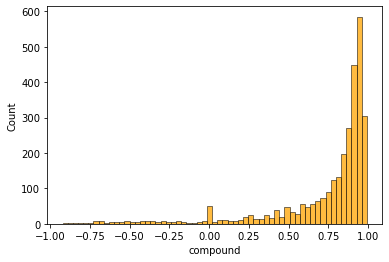

In [30]:
sns.histplot(new_data['compound'],color='orange')


<AxesSubplot:xlabel='pos', ylabel='Count'>

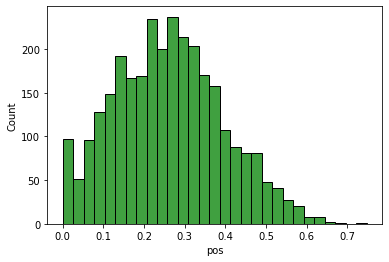

In [31]:
sns.histplot(new_data['pos'], color='green')

<AxesSubplot:xlabel='neg', ylabel='Count'>

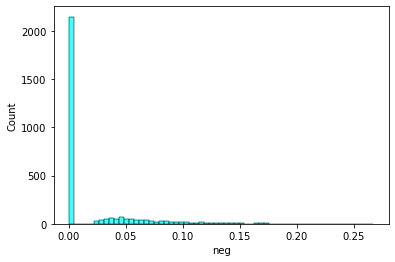

In [32]:
sns.histplot(new_data['neg'], color='cyan')

In [33]:
(new_data['compound']<=0).groupby(new_data['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
44 Thaikitchen "KATA FOOD COURT"                           4
Autogrill Risto Bar Pizza                                 10
Burger House Kata Beach                                    6
Chai Thaifood Restaurant                                  10
Curry Delight Indian Restaurant                            1
Eightfold Restaurant                                       5
En Vogue Restaurant                                        7
Horn Grill Steak and Seafood                              11
Istanbul Turkish Restaurant                                8
Kampong Kata Hill                                          9
Kata On Fire Bar and Grill                                 8
Kataturk Turkish Restaurant                                6
Kwong Shop Seafood                                         6
Leonardo Davinci                                           9
Mom Tri's Kitchen at Villa Royale                          5
New York Burger Co.                                        4
Od

In [34]:
(new_data['compound']>0).groupby(new_data['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
44 Thaikitchen "KATA FOOD COURT"                          89
Autogrill Risto Bar Pizza                                 90
Burger House Kata Beach                                   94
Chai Thaifood Restaurant                                  90
Curry Delight Indian Restaurant                           99
Eightfold Restaurant                                      95
En Vogue Restaurant                                       93
Horn Grill Steak and Seafood                              89
Istanbul Turkish Restaurant                               92
Kampong Kata Hill                                         91
Kata On Fire Bar and Grill                                92
Kataturk Turkish Restaurant                               94
Kwong Shop Seafood                                        94
Leonardo Davinci                                          91
Mom Tri's Kitchen at Villa Royale                         95
New York Burger Co.                                       96
Od

In [35]:
neg_percent = pd.DataFrame((new_data['compound']<=0).groupby(new_data['Hotel/Restaurant name']).sum()/
                          new_data['Hotel/Restaurant name'].groupby(new_data['Hotel/Restaurant name']).count()*100,
                          columns=['% of negative reviews']).sort_values(by='% of negative reviews')

neg_percent

,% of negative reviews
Hotel/Restaurant name,
Curry Delight Indian Restaurant,1.000000
Odysseus Greek Organic Restaurant,2.000000
Red Corner,3.225806
The Tavern,4.000000
Red Duck Restaurant,4.000000
Red Chair Restaurant,4.000000
Palm Square,4.000000
New York Burger Co.,4.000000
"44 Thaikitchen ""KATA FOOD COURT""",4.301075


In [36]:
pos_percent = pd.DataFrame((new_data['compound']>0).groupby(new_data['Hotel/Restaurant name']).sum()/
                          new_data['Hotel/Restaurant name'].groupby(new_data['Hotel/Restaurant name']).count()*100,
                          columns=['% of positive reviews']).sort_values(by='% of positive reviews')

pos_percent

,% of positive reviews
Hotel/Restaurant name,
Two Chefs Kata Center,89.000000
Horn Grill Steak and Seafood,89.000000
Autogrill Risto Bar Pizza,90.000000
Chai Thaifood Restaurant,90.000000
Pomodoro Pizza Restaurant,90.000000
Two Chefs Kata Beach,91.000000
Leonardo Davinci,91.000000
Kampong Kata Hill,91.000000
Peony Cafe & Restaurant,91.000000


<AxesSubplot:xlabel='% of negative reviews', ylabel='Hotel/Restaurant name'>

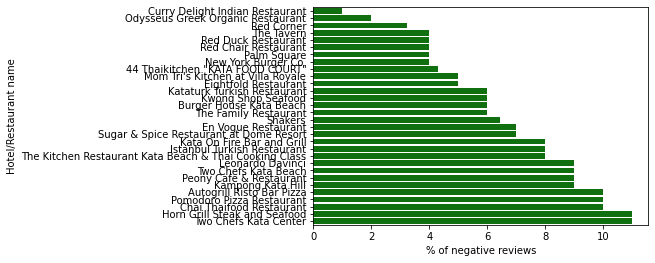

In [37]:
sns.barplot(data=neg_percent, x='% of negative reviews', y=neg_percent.index, color='g')

<AxesSubplot:xlabel='% of positive reviews', ylabel='Hotel/Restaurant name'>

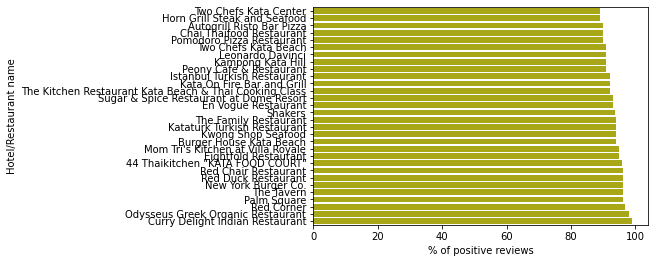

In [38]:
sns.barplot(data=pos_percent, x='% of positive reviews', y=pos_percent.index, color='y')

In [39]:
##### Text Minning   #######


In [40]:
def preprocess_text(text):
  
  tokenized_text = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  stop_words = nltk.corpus.stopwords.words('english')
  cleaned_tokens = [word.lower() for word in tokenized_text if word.lower() not in stop_words]
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [41]:
new_data['preprocessed_reviews'] = new_data['Review'].apply(preprocess_text)


C:\Users\toshiba\AppData\Local\Temp\ipykernel_7164\2039796050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['preprocessed_reviews'] = new_data['Review'].apply(preprocess_text)


In [42]:
positive_reviews_subset = new_data.loc[(new_data['Hotel/Restaurant name']== 'Curry Delight Indian Restaurant') & 
                                         (new_data['compound']>0),:]
negative_reviews_subset = new_data.loc[(new_data['Hotel/Restaurant name']== 'Two Chefs Kata Center') &
                                         (new_data['compound']<=0),:]



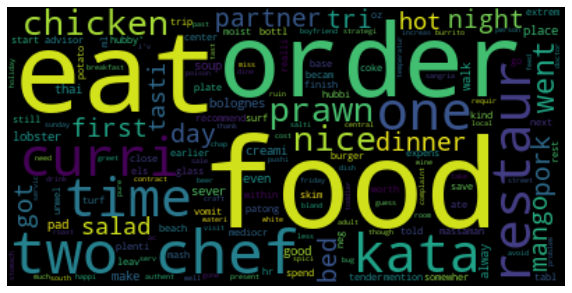

In [49]:
negative_tokens = [word for review in negative_reviews_subset['preprocessed_reviews'] for word in review]

wordcloud = WordCloud(background_color='black').generate_from_text(' '.join(negative_tokens))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

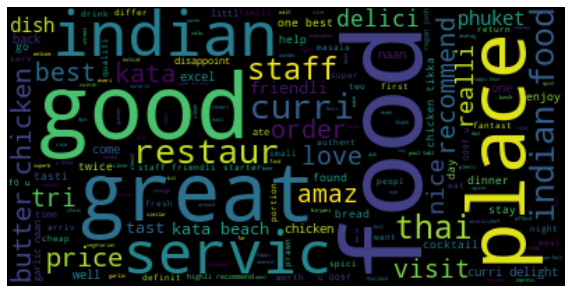

In [50]:
positive_tokens = [word for review in positive_reviews_subset['preprocessed_reviews'] for word in review]

wordcloud = WordCloud(background_color='black').generate_from_text(' '.join(positive_tokens))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
from nltk.probability import FreqDist
pos_freqdist = FreqDist(positive_tokens)
pos_freqdist.tabulate(10)

   food  indian    good   curri   great   place chicken    kata  servic   staff 
     95      54      47      38      36      35      35      29      28      28 


In [46]:
neg_freqdist = FreqDist(negative_tokens)
neg_freqdist.tabulate(10)

   food     eat     two    chef   order restaur   curri    time     one    kata 
      6       5       4       4       4       3       3       3       3       3 


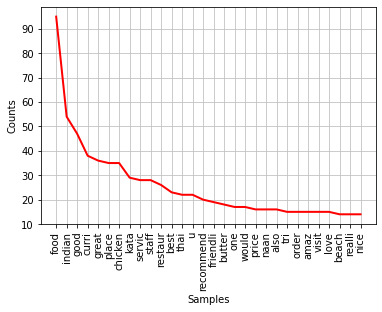

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [47]:
pos_freqdist.plot(30,color='red')

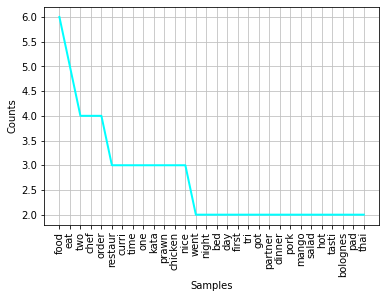

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [48]:
neg_freqdist.plot(30,color='cyan')